In [1]:
from jax_md import *
from jax_md import energy
import jax
import jax.random as jr
import jax.numpy as jnp
import matplotlib.pyplot as plt

# jax.config.update("jax_enable_x64", True)

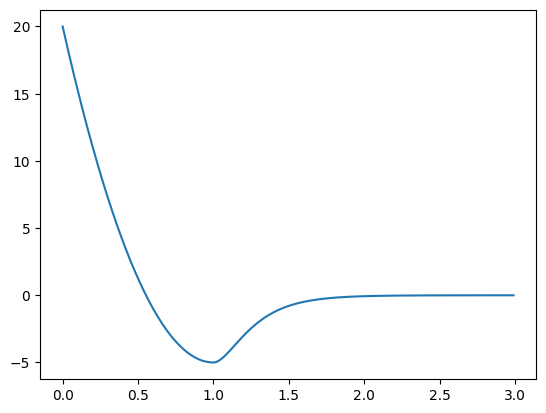

In [21]:
import numpy as np
def harmonic_morse(dr, D0=5.0, alpha=5., r0=1., k=50.0, **kwargs):
  U = jnp.where(dr < r0, 
               0.5 * k * (dr - r0)**2 - D0,
               D0 * (np.exp(-2. * alpha * (dr - r0)) - 2. * np.exp(-alpha * (dr - r0)))
               )
  return jnp.array(U, dtype=dr.dtype)

drs = np.arange(0,3,0.01)
U = harmonic_morse(drs)
plt.plot(drs,U)
plt.show()

setup

In [2]:
dim = 1
box_size = 50

displacement stuff

In [3]:
displacement, shift = space.periodic(box_size)
metric = space.metric(displacement)
v_displacement = space.map_product(displacement)
v_metric = space.map_product(metric)

In [40]:
n1 = jnp.linspace(15, 20, 101)
n2 = jnp.linspace(35, 40, 101)
n = jnp.concatenate((n1, n2))[:, None]
radii = jnp.linspace(0, 25, 101)
dr = 0.5*box_size/101
g = quantity.pair_correlation(metric, radii, dr, compute_average=True)

In [41]:
rdf = g(n)

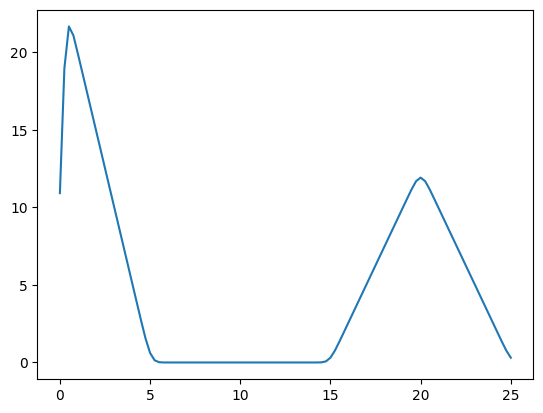

In [43]:
plt.plot(radii, rdf)
plt.show()